<a href="https://colab.research.google.com/github/NayoungShin/projectmanager/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_excel('./sample_data/car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


In [ ]:
df.price.describe()

count     274.000000
mean      853.660584
std       332.613127
min       190.000000
25%       620.000000
50%       805.000000
75%      1090.000000
max      1820.000000
Name: price, dtype: float64

In [ ]:
df.describe()

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [ ]:
df.price.mean()


853.6605839416059

In [ ]:
df.price.median()

805.0

In [ ]:
df.model.value_counts()

Avante    205
K3         69
Name: model, dtype: int64

In [ ]:
df.price.min()

190

In [ ]:
df.price.quantile(.25)

620.0

In [ ]:
df.price.max() - df.price.min()  # 범위 = 최댓값 - 최솟값  범위는 min 190~1630이 된다.

1630

In [ ]:
df.sort_values('price') # price 순으로 정렬

,mileage,model,price,year,my_car_damage,other_car_damage
253,152000,Avante,190,2007,6748356,330800
259,47743,Avante,220,2006,6249300,55108900
260,105856,Avante,230,2009,9769990,417820
267,310000,Avante,250,2008,1047529,0
266,184000,Avante,250,2006,1481678,925600
...,...,...,...,...,...,...
7,2287,K3,1599,2018,0,0
106,37152,Avante,1720,2016,0,0
84,9600,Avante,1799,2018,315398,0
120,9000,Avante,1820,2017,878760,793850


In [ ]:
df.price.quantile(.75) - df.price.quantile(.25)  # 사분위간범위(IQR) = 3사분위수 - 1사분위수

470.0

In [ ]:
df.price.quantile(.90) - df.price.quantile(.10)  # 십분위간범위

884.0

In [ ]:
 !pip install seaborn

<Axes: xlabel='price'>

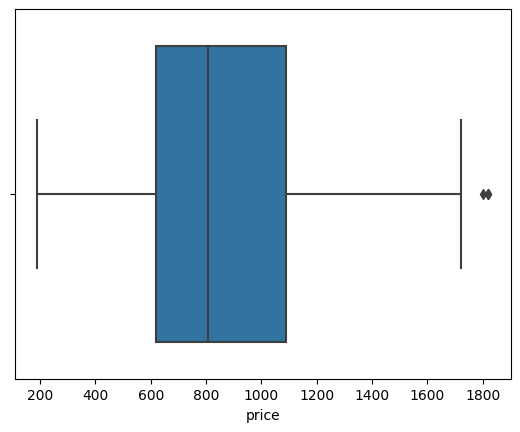

In [ ]:
import seaborn as sns
sns.boxplot(x='price',data=df)

<Axes: xlabel='price', ylabel='model'>

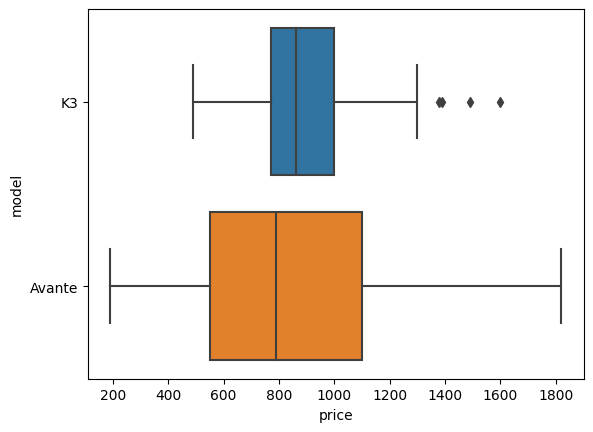

In [ ]:
sns.boxplot(x='price',y='model', data=df)

In [ ]:
df.price.var()  #분산

110631.4924333574

In [ ]:
df.price.std()  #표준편차

332.61312727154564

<Axes: xlabel='price', ylabel='Count'>

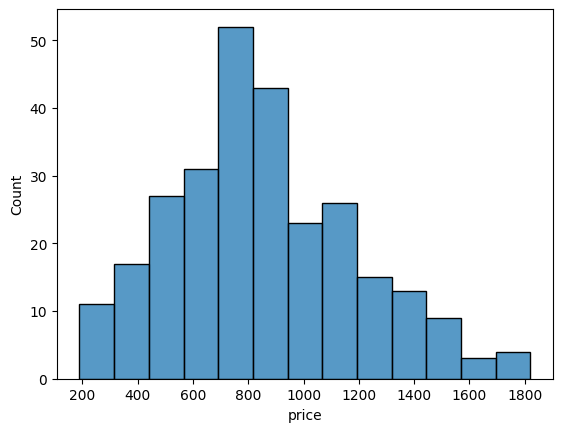

In [ ]:
import seaborn as sns
sns.histplot(x='price',data=df, bins=13)

<Axes: xlabel='price', ylabel='Count'>

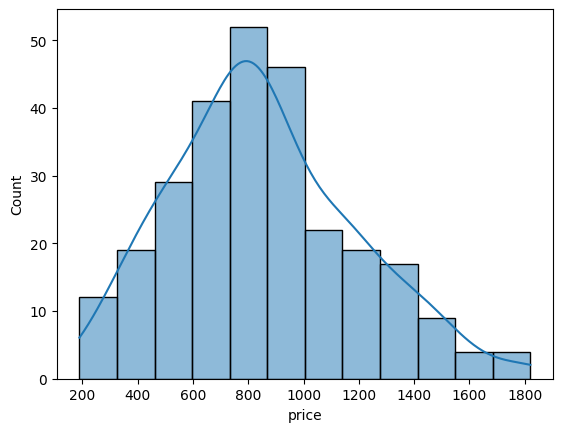

In [ ]:
sns.histplot(x='price',data=df, kde=True) #곡선을 만들어주는것

In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=7b0e237ce4fa2d0b12b19af5bad9d3e5eb7487ef9c851e99777994cb5a5810a4
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import pingouin as pg
pg.ttest(df.price,0,confidence=.95)  #95프로 신뢰구간  100번중 95번은 814-893만원 구간일것이다. 오차범위는 853±

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,42.483582,273,two-sided,2.486212e-122,"[814.1, 893.22]",2.566527,2.773e+118,1.0


In [ ]:
df.price.mean()

853.6605839416059

### Mileage 기준
평균, 중간값,표준편차 구하기


In [3]:
df.mileage.mean()  # 평균

77483.22262773722

In [4]:
df.mileage.median()  #중간값

71649.0

<Axes: xlabel='mileage'>

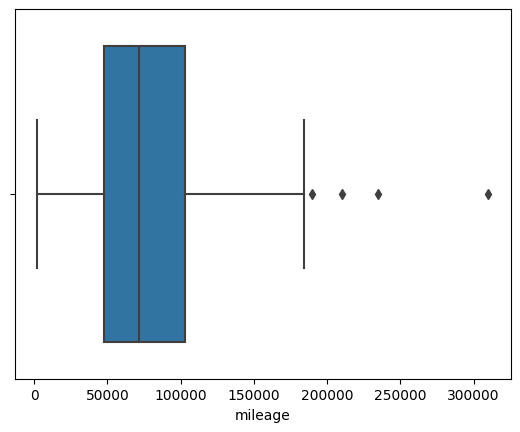

In [6]:
import seaborn as sns
sns.boxplot(x='mileage',data=df)

In [5]:
df.mileage.std()  #표준편차

43015.79445317075

In [7]:
df.mileage.describe()  #기술통계 모두 구하기

count       274.000000
mean      77483.222628
std       43015.794453
min        2287.000000
25%       47597.500000
50%       71649.000000
75%      103193.750000
max      310000.000000
Name: mileage, dtype: float64

In [10]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=2ab09fbe3fcd7fae8b6a447448c2dab6945c2b46cdb966ff3cf1c9d4ada4100e
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [11]:
import pingouin as pg
pg.ttest(df.mileage,0,confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,29.816386,273,two-sided,7.513310e-88,"[72367.22, 82599.22]",1.801274,1.384e+84,1.0


In [ ]:
# 전수 조사를한다면...이렇게 나올수 있다는 추정치
 [72367.22, 82599.22]

In [13]:
pg.ttest(df.price, 800, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.670492,273,two-sided,0.008028,"[814.1, 893.22]",0.16133,2.205,0.758389


In [ ]:
0.008028 < 0.05 # 800만원의 경우에는 p < 유의수준 이므로 신뢰구간에 포함 X

In [12]:
pg.ttest(df.price, 850, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.182174,273,two-sided,0.855581,"[814.1, 893.22]",0.011006,0.069,0.053784


In [ ]:
0.855581 < 0.05 # 850만원의 경우에는 p > 유의수준 이므로 신뢰구간에 포함 O

Avante 평균 - K3 평균이 표본에서 -80만원인데 모집단에서는 95% 신뢰구간이 -152 ~ -8 어쨌든 모집단에서 Avante의 평균이 K3의 평균보다 낮다는 결론

귀무가설(기각할 가설): 둘이 똑같다(평균 차이 = 0)

0.028187 < 0.05

귀무가설 기각 -> 둘은 평균이 다르다

"통계적으로 유의한 차이"(Avante와 K3의 차이를 확인할 수 있을만큼 데이터가 충분하다)

귀무가설 기각이 안되면 -> 둘의 평균이 같다(X) -> 이럴 수도(Avante가 더 비쌀 수도) 있고, 저럴 수도(K3가 더 비쌀 수도) 있다

신뢰수준(또는 유의수준)은 여러분이 감당할 수 있는 수준에서 결정하면 됨

좀 틀려도 괜찮다 95%(즉 5% 정도는 틀려도 됨)- 아 이건 좀 틀리면 곤란한데.. 99%(즉 1%정도만 틀리겠다)

In [14]:
avante=df.price[df.model=='Avante']
k3=df.price[df.model=='K3']

In [15]:
pg.ttest(avante,k3,confidence=0.95)  # 두 집단의 평균을 비교

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.21101,196.691919,two-sided,0.028187,"[-152.11, -8.69]",0.242614,1.482,0.4119


In [17]:
pg.corr(df.price, df.mileage) #두 data의 상관관계

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


- r(표본상관계수): -0.67616
    - 부호가 - => 서로 반대로 움직인다
    - 많이 돌아다닌 차는 가격이 떨어진다
- 모집단에서는 어떨까?
    - 95% 신뢰구간: -0.74 ~ -0.61  
- 귀무가설: 모집단 상관계수 = 0(관련이 없다)
    - 5.809388e-38 < 0.05
    - 귀무가설 기각 => 관련이 있다

In [18]:
df.corr(numeric_only=True)

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


<Axes: xlabel='mileage', ylabel='price'>

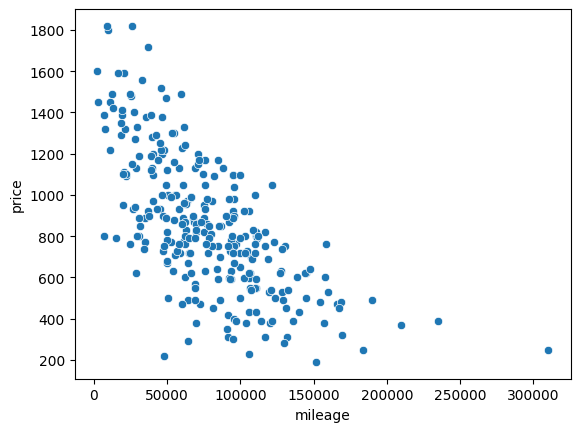

In [19]:
import seaborn as sns
sns.scatterplot(x='mileage', y='price', data=df)

In [20]:
from statsmodels.formula.api import ols
m = ols('price ~ mileage', data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.81e-38
Time:                        04:10:59   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='mileage', ylabel='price'>

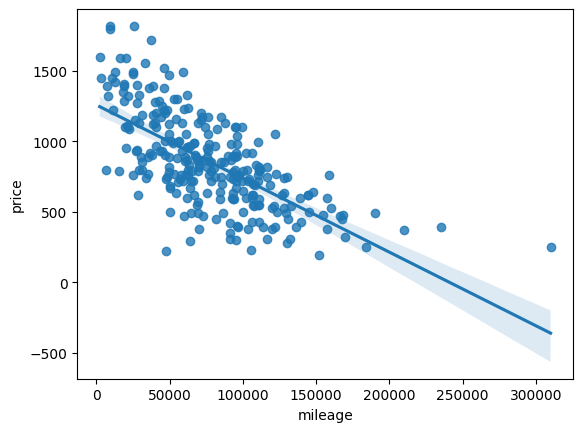

In [21]:
sns.regplot(x='mileage', y='price', data=df)